In [1]:
import numpy as np
import glob

In [2]:
dir='/vol/astro3/lofar/lora/testOutputV2/'

In [3]:
filelist=glob.glob(dir+'*.txt')

In [4]:
print(len(filelist))
print(filelist[0])

101913
/vol/astro3/lofar/lora/testOutputV2/20200301_1751_event_7.txt


gps, nsec, timestamp, density

In [5]:
def read_file(name):
    try:
    #for t in np.arange(1):
        data=np.genfromtxt(name,skip_header=10,usecols=(1,2,3,4))
        fo = open(name, "r+")
        line = fo.readline()
        event=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        gps_timestamp=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        nsec=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        stations_str=line.strip().split(':')[1]
        hold=(stations_str[2:(len(stations_str)-1)])
        #print(hold.split(' '))
        without_empty_strings = [string for string in hold if (string != '')*(string != ' ')*(string != '.')]
        #print(without_empty_strings)
        stations = [int(i) for i in without_empty_strings]
        if 0 in stations:
            stations=[10]
        #print(float(stations_str[0].split))
        #print(stations)
        #stations=stations_str

        line = fo.readline()
        index=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        theta=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        phi=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        core_x=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        core_y=int(float(line.strip().split(':')[1]))
        line = fo.readline()
        core_z=int(float(line.strip().split(':')[1]))
    
        fo.close()
        flag=0
        return event,gps_timestamp,nsec,stations,index,theta,phi,core_x,core_y,core_z,data,flag
    except:
        flag=1
        return 0,0,0,0,0,0,0,0,0,0,0,flag


In [6]:
event,gps_timestamp,nsec,stations,index,theta,phi,core_x,core_y,core_z,data,flag=read_file(filelist[10])

In [10]:
info_all=[]
nsec_list=[]
sec_list=[]

In [11]:
for i in np.arange(len(filelist)):
    event,gps_timestamp,nsec,stations,index,theta,phi,core_x,core_y,core_z,data,flag=read_file(filelist[i])
    if flag==0:
        event_info={'event':event, 'gps_timestamp':gps_timestamp,'nsec':nsec,'stations':stations,'theta':theta,'phi':phi,'core_x':core_x,'core_y':core_y,'data':data}
        info_all.append(event_info)
        nsec_list.append(nsec)
        sec_list.append(gps_timestamp)


In [12]:
print(len(info_all))
print(len(nsec_list))
print(len(sec_list))

101913
101913
101913


In [13]:
test=sorted(info_all, key=lambda vertex: (sec_list, nsec_list))
sec_sorted=sorted(sec_list)
args_sorted=np.argsort(np.asarray(sec_list))
args_sorted=np.lexsort((np.asarray(nsec_list),np.asarray(sec_list)))

In [14]:
print(len(test))

101913


In [15]:
for i in np.arange(0,10000):
    print(sec_list[i],info_all[args_sorted[i]]['event'],sec_list[args_sorted[i]],nsec_list[args_sorted[i]])

1583085201 51557 902126936 506918481
1583085220 20769 1318725959 215218687
1583085236 20770 1318725959 513849800
1583085245 12637 1318927307 390649706
1583085326 106883 1582715323 643793611
1583085338 38427 1582848542 101387238
1583085376 38428 1582848542 333384918
1583085400 38434 1582848584 213002933
1583085457 38438 1582848633 96043030
1583085476 38442 1582848658 399010318
1583085501 38443 1582848666 154496529
1583085518 38448 1582848685 865323446
1583085527 38454 1582848709 480625127
1583085559 38461 1582848738 417451178
1583085595 38463 1582848745 10769002
1583085691 38465 1582848753 711655875
1583085721 38469 1582848769 154464600
1583085735 38473 1582848792 491520067
1583085759 38475 1582848807 422846681
1583085772 38493 1582848893 786482877
1583085822 38496 1582848898 65982798
1583085836 38500 1582848905 647566897
1583085872 38504 1582848933 148817046
1583085904 38512 1582848957 556160339
1583085923 38513 1582848959 727618314
1583085975 38514 1582848980 418054320
1583086012 3851

1583108235 42588 1582869944 452631944
1583108297 42590 1582869962 18461948
1583108434 42593 1582869972 773580440
1583108445 42595 1582869978 498650616
1583108511 42596 1582869982 958337875
1583108541 42597 1582869986 694168556
1583108553 42599 1582869991 595713823
1583108582 42603 1582870012 108519566
1583108587 42604 1582870013 611807525
1583108588 42605 1582870014 916998912
1583108671 42607 1582870028 381805586
1583108674 42614 1582870072 550625936
1583108686 42616 1582870078 373829693
1583108696 42624 1582870134 919214711
1583108704 42625 1582870135 865575615
1583108705 42631 1582870159 645612181
1583108719 42632 1582870164 192829458
1583108783 42640 1582870230 863456731
1583108814 42646 1582870260 435954177
1583108850 42653 1582870279 984436255
1583108854 42657 1582870303 457511954
1583108906 42661 1582870320 462679599
1583108919 42663 1582870326 468814671
1583108940 42666 1582870330 661012490
1583108941 42670 1582870370 785523643
1583108957 42672 1582870373 26453482
1583108970 426

1583201600 46599 1582885815 505920459
1583717904 46602 1582885833 654521704
1584029789 46603 1582885834 658130690
1584029838 46618 1582885855 981528529
1583370693 46622 1582885860 317144676
1584029853 46643 1582885889 475706295
1583456685 46655 1582885905 71998578
1583717907 46678 1582885927 872608573
1583287930 46713 1582885969 108123556
1583201604 46731 1582886006 952409148
1583370827 46800 1582886116 831616222
1583628799 46805 1582886134 433548311
1584029936 46847 1582886203 959933430
1584029943 46848 1582886203 981042159
1583717969 46857 1582886207 893942088
1584029958 46867 1582886219 348469347
1583628822 46891 1582886272 348276729
1584029993 46899 1582886294 202370660
1583456696 46902 1582886299 469739467
1583287954 46903 1582886300 457035253
1583370859 46913 1582886322 414065219
1583201620 46939 1582886407 511673698
1584029995 46947 1582886433 140072749
1584029998 46965 1582886477 594567583
1583717980 46976 1582886504 21000646
1583628915 46975 1582886504 449731097
1584030014 469

1584038329 57670 1582905005 325035022
1583022367 57701 1582905164 184949541
1583372834 57703 1582905173 268394303
1583458923 57716 1582905253 58664459
1583720638 57727 1582905288 412349816
1584038368 57729 1582905294 604604369
1583631768 57734 1582905318 886957132
1583203445 57736 1582905322 999151478
1583289509 57742 1582905355 1573983
1583542653 57745 1582905380 752137585
1583022391 57751 1582905420 708302074
1584038517 57753 1582905431 775954818
1584038552 57774 1582905522 185471102
1583720727 57787 1582905573 474505793
1584038563 57788 1582905574 58395765
1583022414 57790 1582905586 496509768
1583542656 57791 1582905596 571242248
1583458972 57797 1582905620 322972433
1583372869 57812 1582905683 497002663
1583631793 57827 1582905813 963630643
1584038583 57828 1582905815 578033870
1583289520 57834 1582905851 856434294
1583203453 57837 1582905863 540312067
1583022422 57840 1582905895 238981242
1584038603 57847 1582905915 134560776
1584038635 57852 1582905931 671189960
1583720836 57856

1583373905 59722 1582916760 951615901
1583290121 59723 1582916767 138612797
1583204465 59732 1582916799 683706318
1584041544 59746 1582916877 553323010
1583544045 59750 1582916901 656747499
1583974500 59766 1582917010 35613962
1583023927 59767 1582917016 416738359
1584041556 59770 1582917034 849171113
1583722064 59773 1582917051 6281103
1583974506 59778 1582917105 462106605
1584041578 59782 1582917123 105608897
1583023948 59784 1582917131 876370345
1583633092 59789 1582917174 477114955
1583459852 59794 1582917204 25047566
1583544046 59797 1582917208 14274524
1584041651 59810 1582917255 197811761
1583974654 59811 1582917256 249523556
1583373917 59817 1582917287 657226951
1583204473 59822 1582917343 479354793
1583290124 59823 1582917347 637158072
1584041670 59825 1582917360 653357332
1583023979 59828 1582917369 40338704
1583722127 59838 1582917450 122749356
1583974666 59841 1582917484 697050347
1584041680 59844 1582917518 190507380
1583544050 59847 1582917560 559149952
1583633096 59850 1

1583025975 62733 1582932579 997980706
1584046501 62736 1582932581 128574076
1583977964 62738 1582932584 589022754
1583723443 62749 1582932608 80484571
1584046516 62754 1582932613 965242877
1583026009 62759 1582932632 242582296
1583634758 62776 1582932726 16447362
1583545614 62777 1582932726 703690829
1584046519 62784 1582932748 681551387
1583291272 62785 1582932769 81356680
1583205718 62794 1582932823 389808930
1583977981 62803 1582932876 122738476
1583460737 62807 1582932898 930074367
1584046587 62824 1582932972 795233794
1583375184 62836 1582933013 30930718
1583026021 62840 1582933045 406452431
1583723539 62843 1582933079 413535103
1583977994 62844 1582933085 794987489
1584046664 62847 1582933095 278554987
1583545648 62854 1582933120 285319982
1583634798 62861 1582933152 997383771
1584046745 62866 1582933174 41064606
1583026030 62869 1582933183 282765704
1583978002 62890 1582933306 626462182
1584046755 62892 1582933316 268330675
1583205736 62915 1582933416 107764542
1583291298 62916 

1583547900 66621 1582949755 911983738
1583461895 66644 1582949901 971560367
1583981463 66649 1582949918 489332862
1584051482 66651 1582949923 648047838
1583028419 66659 1582949967 204205128
1584051512 66664 1582950001 982056237
1583981464 66665 1582950002 487202835
1583725535 66666 1582950009 246551580
1583206703 66667 1582950013 6551704
1583292923 66679 1582950060 741398897
1583636450 66681 1582950062 276144873
1583547935 66682 1582950064 468681564
1584051533 66686 1582950081 224900901
1583028424 66687 1582950085 263823929
1583377066 66688 1582950085 554083935
1583981497 66690 1582950090 808362415
1584051537 66691 1582950092 21393634
1583461896 66692 1582950092 285154582
1583028443 66696 1582950105 142224823
1584051547 66699 1582950113 232120662
1583725555 66701 1582950118 665758590
1583547943 66716 1582950189 745499190
1583981522 66722 1582950212 118962763
1583636503 66729 1582950235 922119365
1584051569 66734 1582950259 500417927
1583206705 66736 1582950268 528949104
1583292927 6674

1584055837 76262 1582964566 622444648
1583207606 76263 1582964568 505507915
1583984870 76267 1582964581 377747399
1583727460 76271 1582964629 669394112
1584055843 76276 1582964673 731965037
1583029832 76285 1582964690 907243435
1583293849 76297 1582964753 266446131
1583549729 76299 1582964759 493483258
1583984881 76307 1582964798 739728612
1584055855 76309 1582964802 516710239
1583638148 76314 1582964838 162401810
1584055857 76315 1582964838 942984405
1583029834 76317 1582964857 716703700
1583984930 76321 1582964863 731307589
1582934963 76329 1582964922 33354632
1583727525 76331 1582964924 865857512
1583462644 76335 1582964946 890238299
1583378111 76336 1582964949 278467387
1584055936 76339 1582964960 717366417
1583207615 76345 1582964990 383262197
1583549735 76351 1582965012 806271954
1583293855 76355 1582965020 593170646
1583984990 76365 1582965073 13896717
1584055950 76364 1582965073 34881675
1583029836 76366 1582965076 248375532
1583638242 76375 1582965110 906438171
1584056061 7637

1583888072 79392 1582978972 122699020
1583551585 79396 1582978998 827080106
1583801585 79400 1582979015 438212866
1584060300 79401 1582979016 344284773
1583987844 79405 1582979039 63136291
1584060380 79407 1582979043 214583925
1583463627 79412 1582979066 135419540
1583379251 79414 1582979088 977196583
1582935793 79421 1582979122 64614927
1583729066 79425 1582979148 919677027
1583208786 79437 1582979225 300414805
1583295066 79442 1582979252 22583717
1583030969 79444 1582979256 349514625
1584060409 79446 1582979268 229163268
1583639603 79450 1582979290 861577304
1583987865 79453 1582979298 283542411
1583551601 79461 1582979338 613580194
1583801623 79467 1582979374 960804311
1584060456 79468 1582979375 83869972
1583888090 79474 1582979396 537532056
1583987876 79475 1582979422 767127712
1584060546 79477 1582979446 199554172
1583030986 79487 1582979519 187535905
1583729072 79489 1582979533 142481286
1582935828 79490 1582979543 257956431
1583463652 79492 1582979575 131684479
1584060580 79496

1583731173 82956 1582997443 577436600
1583553910 82958 1582997453 894666306
1583032523 82959 1582997457 204375816
1583803021 82962 1582997463 906972635
1583992212 82967 1582997475 37674296
1583890115 82976 1582997533 170836142
1583641235 82981 1582997578 378448014
1583210187 82982 1582997584 281172592
1583296603 82994 1582997648 231736938
1583381180 83002 1582997671 181696497
1583465093 83005 1582997687 809557212
1582937004 83016 1582997717 517134704
1583992216 83017 1582997720 674203695
1583032590 83020 1582997733 218442942
1583731180 83023 1582997774 223576730
1583553936 83025 1582997794 182982064
1583992262 83028 1582997813 45941419
1583803037 83032 1582997844 231935078
1583641253 83033 1582997848 721496400
1583032591 83034 1582997862 842203663
1583992317 83036 1582997890 204104467
1583890120 83038 1582997893 770807794
1583210194 83041 1582997914 825740893
1583296606 83051 1582997976 329127966
1583553945 83052 1582997979 800878939
1583381222 83059 1582998021 493943006
1582937016 830

1583034063 85475 1583011134 228967797
1583466045 85476 1583011148 657005361
1583995769 85477 1583011151 164716556
1583733176 85480 1583011164 548833565
1583555445 85483 1583011176 674833340
1582937699 85488 1583011204 628639122
1583891640 85491 1583011231 743741658
1583034064 85504 1583011294 173512776
1583804709 85509 1583011313 236420180
1583995774 85510 1583011320 670938269
1583642936 85532 1583011484 302555981
1583211617 85533 1583011487 435993313
1583382629 85537 1583011508 563991075
1583297701 85539 1583011523 732393253
1583995787 85540 1583011525 167243535
1583733278 85544 1583011544 406386280
1583466047 85554 1583011576 797765043
1583034099 85559 1583011588 786544668
1583555494 85562 1583011607 344961846
1583995814 85565 1583011624 582371062
1583804713 85569 1583011662 979484768
1582937745 85570 1583011668 883288448
1583891648 85574 1583011689 54137405
1583642998 85584 1583011731 234406539
1583382630 85585 1583011731 622932184
1583211622 85590 1583011754 413017028
1583995901 85

1583298976 88381 1583026212 708556454
1583644718 88389 1583026268 596367280
1582938712 88390 1583026270 517485472
1583892950 88398 1583026292 219581091
1583383702 88402 1583026299 485184816
1583035748 88407 1583026307 667217360
1583806153 88410 1583026315 235637819
1583999292 88416 1583026340 804021826
1583557099 88419 1583026346 445894695
1583999303 88425 1583026376 576039778
1583735260 88429 1583026385 714134427
1583467126 88432 1583026402 274731934
1583035756 88434 1583026406 337466373
1583644799 88444 1583026457 318195988
1583999313 88447 1583026471 937793297
1583212624 88451 1583026497 804245429
1583299072 88455 1583026509 399497913
1582938718 88457 1583026510 313222907
1583806172 88470 1583026553 47939659
1583893058 88481 1583026596 383198052
1583383713 88490 1583026635 749384669
1583557164 88493 1583026660 261191863
1583999354 88495 1583026663 363119493
1583735285 88507 1583026739 749599516
1583035763 88512 1583026770 563033173
1583999554 88513 1583026771 38220117
1583467171 885

1583300391 91515 1583040905 94704125
1583037517 91523 1583040959 360446824
1583736541 91529 1583040981 342152839
1584003511 91537 1583041009 31261282
1583807806 91538 1583041010 36603439
1583468557 91540 1583041024 271234944
1583559475 91549 1583041062 668683834
1584003522 91551 1583041085 532355780
1583646222 91553 1583041088 827666324
1583213733 91555 1583041104 34042655
1583384913 91563 1583041132 232298358
1582939693 91564 1583041133 673870808
1583894864 91578 1583041178 821417099
1583037525 91580 1583041200 473967804
1584003572 91583 1583041206 328354053
1583300445 91589 1583041251 84426626
1583736596 91592 1583041270 481147843
1583559478 91598 1583041284 690670130
1583807819 91606 1583041294 209731719
1583468582 91607 1583041297 747784084
1584003592 91622 1583041385 834193038
1583646292 91624 1583041389 492053807
1583213818 91643 1583041463 827355068
1583037528 91644 1583041473 957077364
1582939711 91646 1583041474 928134989
1583384927 91655 1583041528 818892364
1584003605 91693 

1584006901 94873 1583055677 906883485
1583469464 94875 1583055688 613511187
1582940517 94876 1583055692 633388844
1583039152 94885 1583055727 960410001
1583738168 94892 1583055753 255581611
1583647881 94897 1583055772 821063461
1584006943 94901 1583055783 98291327
1583560994 94903 1583055797 987178205
1583301874 94926 1583055903 649600299
1583896401 94930 1583055911 30916059
1582849375 94932 1583055918 348337398
1583809110 94933 1583055919 692599392
1583039189 94940 1583055961 552571188
1584006967 94946 1583055985 779918364
1583215308 94950 1583056004 849953535
1583386148 94951 1583056008 764664637
1583738169 94956 1583056016 932851792
1582940518 94958 1583056030 742328490
1583469502 94979 1583056109 934625295
1584006997 94995 1583056203 552572626
1583561017 94999 1583056218 757525371
1583647906 95014 1583056264 613843036
1582849375 95016 1583056267 382805718
1583039202 95017 1583056272 654026347
1583809115 95020 1583056301 130742395
1583896405 95021 1583056305 343085507
1583301910 950

1583739731 97959 1583069564 654858890
1583470273 97967 1583069620 936788925
1583040524 97969 1583069630 161157909
1584010388 97970 1583069630 299614642
1583810177 97980 1583069675 249726567
1583649147 97982 1583069693 926940628
1582850335 97984 1583069701 550331347
1583897784 97988 1583069712 915595330
1583562555 97991 1583069724 448967941
1584010402 98000 1583069778 474894355
1583302828 98004 1583069798 296113415
1583387099 98006 1583069816 82466928
1583040560 98018 1583069861 750278802
1583739776 98030 1583069914 206270063
1582941553 98034 1583069942 133530758
1584010432 98035 1583069943 108386714
1583216653 98037 1583069954 105924919
1583810215 98042 1583069978 464298000
1583649169 98047 1583069993 40200138
1582850343 98051 1583070018 953016982
1583562577 98056 1583070038 353544847
1583470306 98058 1583070053 248749481
1584010433 98059 1583070056 615603668
1583040582 98074 1583070160 20407806
1583897814 98077 1583070172 380594974
1583302841 98079 1583070188 245627945
1583739809 9808

1583042021 66 1583085476 364440461
1583811622 72 1583085501 587636812
1583741691 75 1583085518 32437947
1583388208 76 1583085527 322342715
1583899092 83 1583085559 585343079
1584014030 87 1583085595 709340168
1583563971 102 1583085691 862222604
1582942359 109 1583085721 282580557
1583650607 115 1583085735 941607605
1582851224 120 1583085759 753044498
1583303914 122 1583085772 144424219
1583042032 131 1583085822 16820046
1583471097 134 1583085836 120529242
1584014080 141 1583085872 927030710
1583811659 147 1583085904 249002881
1583217400 152 1583085923 367080401
1583741691 158 1583085975 583309999
1584014101 166 1583086012 188662427
1583564054 169 1583086027 756819034
1583042079 182 1583086140 779946537
1583388209 184 1583086157 626933405
1583899103 186 1583086169 203560226
1583650609 188 1583086172 857991166
1582851242 193 1583086201 959005884
1582942359 200 1583086230 946514907
1584014107 203 1583086238 78051813
1583303970 206 1583086251 288887642
1583471099 207 1583086259 74328748
15

In [27]:
#for i in np.arange(0,len(info_all)):
for i in np.arange(0,len(info_all)):

    time0= info_all[i]['gps_timestamp']
    nsec0= info_all[i]['nsec']

    nStn=len(info_all[i]['stations'])
    if nStn>3:
        print('\n\n\n______________ {0} ______________ \n'.format(info_all[i]['event']))
        #print()
        
        print('        {0}   {1}    {2}'.format(info_all[i-10]['gps_timestamp'],info_all[i-10]['nsec'],info_all[i-10]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-9]['gps_timestamp'],info_all[i-9]['nsec'],info_all[i-9]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-8]['gps_timestamp'],info_all[i-8]['nsec'],info_all[i-8]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-7]['gps_timestamp'],info_all[i-7]['nsec'],info_all[i-7]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-6]['gps_timestamp'],info_all[i-6]['nsec'],info_all[i-6]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-5]['gps_timestamp'],info_all[i-5]['nsec'],info_all[i-5]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-4]['gps_timestamp'],info_all[i-4]['nsec'],info_all[i-4]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-3]['gps_timestamp'],info_all[i-3]['nsec'],info_all[i-3]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-2]['gps_timestamp'],info_all[i-2]['nsec'],info_all[i-2]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i-1]['gps_timestamp'],info_all[i-1]['nsec'],info_all[i-1]['stations']))

        print('******* {0}   {1}    {2}'.format(time0,nsec0,info_all[i]['stations']))
        
        print('        {0}   {1}    {2}'.format(info_all[i+1]['gps_timestamp'],info_all[i+1]['nsec'],info_all[i+1]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+2]['gps_timestamp'],info_all[i+2]['nsec'],info_all[i+2]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+3]['gps_timestamp'],info_all[i+3]['nsec'],info_all[i+3]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+4]['gps_timestamp'],info_all[i+4]['nsec'],info_all[i+4]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+5]['gps_timestamp'],info_all[i+5]['nsec'],info_all[i+5]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+6]['gps_timestamp'],info_all[i+6]['nsec'],info_all[i+6]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+7]['gps_timestamp'],info_all[i+7]['nsec'],info_all[i+7]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+8]['gps_timestamp'],info_all[i+8]['nsec'],info_all[i+8]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+9]['gps_timestamp'],info_all[i+9]['nsec'],info_all[i+9]['stations']))
        print('        {0}   {1}    {2}'.format(info_all[i+10]['gps_timestamp'],info_all[i+10]['nsec'],info_all[i+10]['stations']))




______________ 801 ______________ 

        1583088684   358437467    [6]
        1583088704   761027153    [3, 4]
        1583088742   310535195    [6]
        1583088747   35392999    [10]
        1583088759   453491813    [3, 4]
        1583088779   343535520    [2, 5]
        1583088788   547110590    [6]
        1583088842   489584054    [3, 4]
        1583088868   720923851    [9]
        1583088895   726085536    [6]
******* 1583088931   218868937    [1, 3, 4, 5]
        1583088999   307247115    [2, 4, 5]
        1583089017   966712545    [1, 2, 4, 5]
        1583089023   37261679    [9]
        1583089038   222131983    [1, 2]
        1583089042   724391434    [3, 4, 5]
        1583089076   266383029    [9]
        1583089088   109957798    [10]
        1583089105   27086771    [10]
        1583089107   756373158    [1, 2, 4]
        1583089118   129424881    [10]



______________ 816 ______________ 

        1583088742   310535195    [6]
        1583088747   35392999    [

        1583806719   206825343    [9]
        1584000786   933029527    [10]
        1582938954   813690734    [6]
        1583735415   702739140    [1, 2, 5]
        1583893625   342674150    [6]
        1583467344   522525913    [1, 2]
        1583036161   258009889    [6]
        1584000817   329686700    [1, 2]
        1583645121   597421591    [9]
        1583557935   277966026    [1, 4]
******* 1583806732   279106252    [1, 3, 4, 5]
        1583212931   648064431    [9]
        1583384208   995051729    [3, 4]
        1584000880   227757051    [1, 2]
        1583299254   443136983    [9]
        1583735417   596241891    [2, 5]
        1583036183   186015182    [4, 5]
        1582939007   998969868    [10]
        1583893627   976142767    [6]
        1584000977   446205856    [1, 4]
        1583467350   575912501    [1, 4]



______________ 128332 ______________ 

        1583558607   677390221    [6]
        1583894151   719118753    [3, 4]
        1584002068   594457852    [9]

        1582858772   945175409    [10]
        1583907067   689088947    [10]
        1582948238   3728272    [9]
        1583050628   241923989    [6]
        1583751864   948426175    [10]
        1583395464   312257234    [10]
        1583224220   298756880    [10]
        1583659169   404558057    [6]
        1583820260   608528059    [2, 5]
        1583573350   433900205    [6]



______________ 88777 ______________ 

        1583050628   241923989    [6]
        1583751864   948426175    [10]
        1583395464   312257234    [10]
        1583224220   298756880    [10]
        1583659169   404558057    [6]
        1583820260   608528059    [2, 5]
        1583573350   433900205    [6]
        1583310568   500562328    [3, 4]
        1583050658   201357337    [3, 4, 5]
        1582858867   491491237    [1, 2]
******* 1583476214   589366119    [1, 2, 3, 4]
        1583907101   741272850    [10]
        1583751941   409927134    [6]
        1582948250   661713420    [6]
        15836

        1583484096   690260791    [1, 2, 5]
        1582956627   646366781    [1, 2, 5]
        1583404307   516171268    [10]
        1583322195   768597304    [1, 4]
        1583832317   419377491    [6]
        1583919879   341295385    [2, 5]
        1582868707   895164816    [1, 2]
******* 1583672838   465157827    [1, 3, 4, 5]
        1584071809   79961766    [6]
        1583234305   325447283    [6]
        1583063135   346531688    [9]
        1583589954   287199395    [10]
        1583770581   843086695    [10]
        1583115852   270402517    [10]
        1583832328   595877030    [10]
        1582956661   79114565    [1, 3]
        1583404321   779926379    [6]
        1583063137   972379104    [6]



______________ 60390 ______________ 

        1583770581   843086695    [10]
        1583115852   270402517    [10]
        1583832328   595877030    [10]
        1582956661   79114565    [1, 3]
        1583404321   779926379    [6]
        1583063137   972379104    [6]
      

        1582881254   105606033    [10]
        1583080533   344584325    [9]
        1583336227   306917238    [9]
        1584088157   160379547    [1, 4]
        1583788568   277038179    [6]



______________ 48605 ______________ 

        1582881315   749302558    [10]
        1583080677   268449130    [6]
        1583493927   931321349    [2, 4]
        1583416549   604764059    [9]
        1583125510   534936706    [6]
        1584088230   830575834    [10]
        1583788617   239849842    [6]
        1584236043   474561256    [9]
        1584155149   959501723    [9]
        1583610518   140524045    [9]
******* 1584321513   635085352    [2, 3, 4, 5]
        1583336244   931709016    [3, 4]
        1583080720   299142514    [1, 3, 4]
        1583849201   501247136    [6]
        1583688684   970024426    [10]
        1582881321   654237733    [10]
        1582966652   164565505    [10]
        1583937455   728454738    [3, 5]
        1584236065   934448012    [6]
        158324

        1584104603   603912273    [6]
        1582892667   672884560    [1, 4]
******* 1583425867   836526159    [1, 3, 4, 5]
        1583258717   194955445    [3, 4]
        1584169713   178991680    [1, 2]
        1583134130   313791182    [3, 4]
        1583704281   543125414    [2, 5]
        1583628158   42120919    [1, 4]
        1583952161   822346860    [6]
        1584414754   369260834    [6]
        1582976528   898885696    [6]
        1584251624   257858680    [1, 4]
        1584338227   249872916    [6]



______________ 178356 ______________ 

        1583628255   143328041    [10]
        1583134173   746018102    [10]
        1584414913   181000368    [10]
        1583704640   595003152    [6]
        1584338357   562791972    [10]
        1584251705   176413147    [3, 4]
        1583426026   682300431    [10]
        1584104741   863630313    [1, 3, 4]
        1583258903   325976656    [6]
        1582892748   562844920    [3, 5]
******* 1583952453   520870813    [1, 


        1583512446   3406923    [10]
        1584118896   833206344    [6]
        1584265512   629151839    [1, 2]
        1583358986   545037675    [6]
        1582902752   659160078    [3, 5]
        1583964942   170606114    [9]
        1584182305   197443667    [9]
        1584427012   864976887    [3, 5]
        1583876552   280623053    [1, 2]
        1583141323   24489392    [10]
******* 1584352053   48266085    [1, 2, 3, 5]
        1582984491   515438877    [1, 2]
        1583269451   265988531    [1, 4]
        1583434744   598453764    [9]
        1584265597   592304409    [1, 4]
        1584118903   411856656    [10]
        1582902771   293821857    [1, 2]
        1584182309   35205597    [6]
        1583964974   679958554    [6]
        1583512474   216607066    [10]
        1583359034   525846368    [10]



______________ 52981 ______________ 

        1584802438   255274838    [10]
        1582902792   282088581    [6]
        1584802440   976160024    [10]
        158

        1584808211   445637438    [6]
        1583446280   654891482    [1, 4]
        1584808212   957221721    [10]
        1584808214   218361945    [6]
        1583149353   585898197    [6]
        1584508218   216096330    [1, 4]
        1584371843   619168777    [1, 2]
        1582995157   32322588    [10]



______________ 112416 ______________ 

        1584808239   647876567    [6]
        1583149426   909509990    [9]
        1582915146   333719458    [1, 4]
        1584808245   649266994    [6]
        1583522253   566017557    [2, 4]
        1584808251   1921298    [9]
        1583281295   775068241    [1, 2]
        1584371948   511991237    [9]
        1584808251   232625648    [10]
        1583446328   53919909    [6]
******* 1584675217   904362082    [1, 3, 4, 5]
        1584135756   767635793    [3, 5]
        1584508240   706723267    [9]
        1584808251   237627972    [6]
        1584196920   726939223    [3, 5]
        1584445164   48248329    [10]
        158428

        1584214992   439201493    [3, 4]
        1584593975   820319938    [10]
        1584299961   416175363    [1, 4]
        1584778012   854637170    [9]
        1584468399   3250825    [1, 4]
        1584526212   535460083    [6]
******* 1584395565   101162103    [1, 3, 4, 5]
        1582927506   289560763    [6]
        1583161459   370995392    [10]
        1583005187   517347239    [9]
        1584778060   436567511    [1, 2, 3, 5]
        1584696982   461335332    [9]
        1584215027   794094866    [6]
        1584594047   688124220    [9]
        1584526233   184807139    [1, 2, 3, 4, 5]
        1584299987   89240522    [9]
        1584468454   871612067    [9]



______________ 127192 ______________ 

        1584214992   439201493    [3, 4]
        1584593975   820319938    [10]
        1584299961   416175363    [1, 4]
        1584778012   854637170    [9]
        1584468399   3250825    [1, 4]
        1584526212   535460083    [6]
        1584395565   101162103    [1, 

        1583017958   284170414    [6]
        1584726014   567461978    [9]
        1583176789   756848893    [1, 4]



______________ 119321 ______________ 

        1583018016   517081665    [10]
        1583176874   570491210    [3, 4]
        1584726226   560784319    [1, 2]
        1584620790   886565724    [6]
        1584555014   829467614    [3, 4]
        1584726269   961164994    [1, 4]
        1583018022   339534818    [9]
        1583176900   631747330    [6]
        1584620904   241509976    [9]
        1584555113   346559258    [3, 4, 5]
******* 1584726276   878058472    [1, 2, 3, 4, 5]
        1584620917   330833915    [1, 4]
        1583018043   990224194    [6]
        1583176940   645642907    [10]
        1584555119   799811391    [6]
        1584726389   827614038    [1, 3]
        1584620951   85177336    [6]
        1583176943   809646365    [6]
        1583018065   666928252    [1, 5]
        1584555195   791220836    [3, 4]
        1584726517   695075653    [10]

In [15]:
for i in np.arange(0,len(info_all)-1):

    time0= test[i]['gps_timestamp']
    time1= test[i+1]['gps_timestamp']

    if time0==1583125204:
        print(i)
        
        #if np.abs(time1-time0)==0:
        print(test[i]['event'])
        print(time0,time1)

25487
8259
1583125204 1583937029
25512
8260
1583125204 1582881032


In [61]:
for i in np.arange(0,len(info_all)-1):

    time0= info_all[i]['gps_timestamp']
    nsec0= info_all[i]['nsec']
    time1= info_all[i+1]['gps_timestamp']
    nsec1= info_all[i+1]['nsec']
    stn0=info_all[i]['stations']
    stn1=info_all[i+1]['stations']
    event0=info_all[i]['event']
    event1=info_all[i+1]['event']

    
    if (time1-time0)==0 and ((6 in stn0) or (6 in stn1)) and ((4 in stn0) or (4 in stn1)):
        print('___________________________________________')
        print('{3} ........ {0}   {1}    {2}'.format(time0,nsec0,stn0,event0))
        print('{3} ........ {0}   {1}    {2}'.format(time1,nsec1,stn1,event1))


___________________________________________
932 ........ 1583089625   612863543    [6]
933 ........ 1583089625   612854786    [2, 3, 4, 5]
___________________________________________
3311 ........ 1583101647   714460062    [6]
3312 ........ 1583101647   775764690    [1, 3, 4]
___________________________________________
3940 ........ 1583104584   450032355    [6]
3941 ........ 1583104584   729109021    [1, 3, 4]


In [17]:
nsec_diff=[]

In [16]:
for i in np.arange(0,len(info_all)-1):
    
    ind0=args_sorted[i]
    ind1=args_sorted[i+1]

    time0= info_all[ind0]['gps_timestamp']
    nsec0= info_all[ind0]['nsec']
    time1= info_all[ind1]['gps_timestamp']
    nsec1= info_all[ind1]['nsec']
    stn0=info_all[ind0]['stations']
    stn1=info_all[ind1]['stations']
    event0=info_all[ind0]['event']
    event1=info_all[ind1]['event']
    
    gpsD0=info_all[ind0]['data'].T[0]
    nsecD0=info_all[ind0]['data'].T[1]
    corrD0=info_all[ind0]['data'].T[2]
    dep0=info_all[ind0]['data'].T[3]
    
    gpsD1=info_all[ind1]['data'].T[0]
    nsecD1=info_all[ind1]['data'].T[1]
    corrD1=info_all[ind1]['data'].T[2]
    dep1=info_all[ind1]['data'].T[3]
    
    if ((10 in stn0) or (10 in stn1)) and ((9 in stn0) or (9 in stn1)) and np.abs(time1-time0)==0:
        print('___________{0}__{1}_____________'.format(event0,event1))
        print(np.abs(nsec1-nsec0))
        nsec_diff.append(np.abs(nsec1-nsec0))
        #print(time0,time1)

        print(nsec0,nsec1)
        print(corrD0[32],corrD0[33],corrD0[34],corrD0[35],nsecD0[36],nsecD0[37],nsecD0[38],nsecD0[39])
        print(corrD1[32],corrD1[33],corrD1[34],corrD1[35],nsecD1[36],nsecD1[37],nsecD1[38],nsecD1[39])



___________41034__41036_____________
730034195


NameError: name 'nsec_diff' is not defined

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


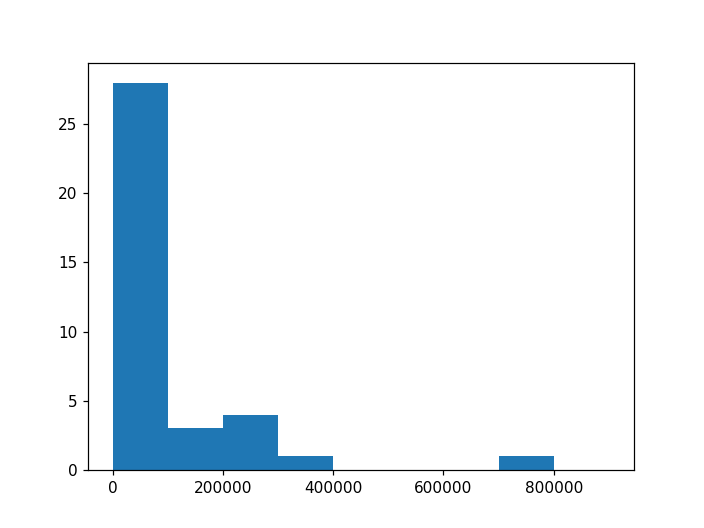

(array([ 28.,   3.,   4.,   1.,   0.,   0.,   0.,   1.,   0.]),
 array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000.]),
 <a list of 9 Patch objects>)

In [21]:
bins=np.arange(0,1e6,1e5)
plt.hist(nsec_diff,bins=bins)

In [22]:
np.sqrt((-512--112)**2+(109-24)**2)*np.sin(50*np.pi/180)/(3e8)*1e9

1044.199099018404

In [23]:
for i in np.arange(0,len(info_all)-1):
    
    ind0=args_sorted[i]
    ind1=args_sorted[i+1]

    time0= info_all[ind0]['gps_timestamp']
    nsec0= info_all[ind0]['nsec']
    time1= info_all[ind1]['gps_timestamp']
    nsec1= info_all[ind1]['nsec']
    stn0=info_all[ind0]['stations']
    stn1=info_all[ind1]['stations']
    event0=info_all[ind0]['event']
    event1=info_all[ind1]['event']
    '''
    gpsD0=info_all[i]['data'].T[0]
    nsecD0=info_all[i]['data'].T[1]
    corrD0=info_all[i]['data'].T[2]
    dep0=info_all[i]['data'].T[3]
    
    gpsD1=info_all[i+1]['data'].T[0]
    nsecD1=info_all[i+1]['data'].T[1]
    corrD1=info_all[i+1]['data'].T[2]
    dep1=info_all[i+1]['data'].T[3]
    '''
    if ((6 in stn0) or (6 in stn1)) and ((3 in stn0) or (3 in stn1)) and ((4 in stn0) or (4 in stn1)) and (np.abs(event0-event1)==1):
        print('___________{0}__{1}_____________'.format(event0,event1))
        
        #nsec_diff.append(np.abs(nsec1-nsec0))
        print('{0}    {1}  --> {2}'.format(time0,time1,np.abs(time0-time1)))#print( )
        print('{0}    {1}  --> {2}'.format(nsec0,nsec1,np.abs(nsec1-nsec0)))#print( )
        #print(corrD0[32],corrD0[33],corrD0[34],corrD0[35],nsecD0[36],nsecD0[37],nsecD0[38],nsecD0[39])
        #print(corrD1[32],corrD1[33],corrD1[34],corrD1[35],nsecD1[36],nsecD1[37],nsecD1[38],nsecD1[39])



___________39478__39479_____________
1582853836    1582853838  --> 2
956214670    543011252  --> 413203418
___________39943__39944_____________
1582856169    1582856169  --> 0
901346193    901354250  --> 8057
___________41447__41448_____________
1582864107    1582864108  --> 1
385595217    785451541  --> 399856324
___________48362__48363_____________
1582892145    1582892148  --> 3
455852081    664628846  --> 208776765
___________48564__48565_____________
1582893336    1582893340  --> 4
227388671    636963466  --> 409574795
___________48565__48566_____________
1582893340    1582893348  --> 8
636963466    177367299  --> 459596167
___________56794__56795_____________
1582900856    1582900864  --> 8
106346287    320112629  --> 213766342
___________57592__57593_____________
1582904627    1582904628  --> 1
239472401    479635426  --> 240163025
___________57856__57855_____________
1582905944    1582905944  --> 0
134482064    134489324  --> 7260
___________60545__60546_____________
1582921359

___________95452__95453_____________
1584598012    1584598016  --> 4
241273161    61274608  --> 179998553
___________95507__95506_____________
1584598389    1584598389  --> 0
719383958    719390961  --> 7003
___________98309__98310_____________
1584618321    1584618334  --> 13
460982002    546792109  --> 85810107
___________98475__98476_____________
1584619486    1584619497  --> 11
696042978    456197536  --> 239845442
___________108452__108453_____________
1584645546    1584645548  --> 2
904340347    232449966  --> 671890381
___________110017__110018_____________
1584657534    1584657536  --> 2
743671738    421741914  --> 321929824
___________110027__110028_____________
1584657581    1584657595  --> 14
693885154    449323638  --> 244561516
___________111318__111319_____________
1584667395    1584667396  --> 1
406717066    693627821  --> 286910755
___________111319__111320_____________
1584667396    1584667405  --> 9
693627821    61681666  --> 631946155
___________111320__111321_______

In [21]:
nsec_diff_lora6=[]
nsec_diff_lora9=[]
nsec_diff_lora10=[]

In [22]:
for i in np.arange(0,len(info_all)-1):
    
    ind0=args_sorted[i]
    ind1=args_sorted[i+1]

    time0= info_all[ind0]['gps_timestamp']
    nsec0= info_all[ind0]['nsec']
    time1= info_all[ind1]['gps_timestamp']
    nsec1= info_all[ind1]['nsec']
    stn0=info_all[ind0]['stations']
    stn1=info_all[ind1]['stations']
    event0=info_all[ind0]['event']
    event1=info_all[ind1]['event']
    
    gpsD0=info_all[ind0]['data'].T[0]
    nsecD0=info_all[ind0]['data'].T[1]
    corrD0=info_all[ind0]['data'].T[2]
    dep0=np.sum(info_all[ind0]['data'].T[3])
    
    gpsD1=info_all[ind1]['data'].T[0]
    nsecD1=info_all[ind1]['data'].T[1]
    corrD1=info_all[ind1]['data'].T[2]
    dep1=np.sum(info_all[ind1]['data'].T[3])
    
    
    
    
    flag1=0
    flag2=0
    flag3=0
    flag4=0
    flag5=0
    flag6=0
    flag9=0
    flag10=0
    sec_flag=0

    if ((10 in stn0) or (10 in stn1)):
        flag10=1
    if ((9 in stn0) or (9 in stn1)):
        flag9=1
    if ((6 in stn0) or (6 in stn1)):
        flag6=1
    if ((1 in stn0) or (1 in stn1)):
        flag1=1
    if ((2 in stn0) or (2 in stn1)):
        flag2=1
    if ((3 in stn0) or (3 in stn1)):
        flag3=1
    if ((4 in stn0) or (4 in stn1)):
        flag4=1
    if ((5 in stn0) or (5 in stn1)):
        flag5=1
    if np.abs(time1-time0)==0:
        sec_flag=1

    if (flag10==1 or flag9==1 or flag6==1) and (flag1+flag2+flag3+flag4+flag5>=4) and sec_flag==1:

    
    #if ((10 in stn0) or (10 in stn1)) and ((9 in stn0) or (9 in stn1)) and np.abs(time1-time0)==0:
        print('\n\n___________{0}__{1}_____________'.format(event0,event1))
        print(stn0,stn1)

        print('gps_timestamps:  {0}  {1}'.format(time0,time1))

        print('nsec:  {0}  {1}   -- > {2}'.format(nsec0,nsec1,np.abs(nsec1-nsec0)))
    
        print('deposit:   {0:.2f} {1:.2f}'.format(dep0,dep1))
        
        if flag10==1:
            nsec_diff_lora10.append(np.abs(nsec1-nsec0))
        if flag9==1:
            nsec_diff_lora9.append(np.abs(nsec1-nsec0))
        if flag6==1:
            nsec_diff_lora6.append(np.abs(nsec1-nsec0))
        




___________38573__38572_____________
[1, 2, 3, 4, 5] [10]
gps_timestamps:  1582849298  1582849298
nsec:  581557850  615338236   -- > 33780386
deposit:   1159.44 27.83


___________42163__42164_____________
[10] [1, 2, 3, 4, 5]
gps_timestamps:  1582867640  1582867640
nsec:  193672425  210848695   -- > 17176270
deposit:   80.50 669.55


___________57856__57855_____________
[1, 2, 3, 4, 5] [6]
gps_timestamps:  1582905944  1582905944
nsec:  134482064  134489324   -- > 7260
deposit:   331.90 38.32


___________61710__61709_____________
[1, 2, 3, 4, 5] [10]
gps_timestamps:  1582927356  1582927356
nsec:  665152864  705199347   -- > 40046483
deposit:   232.25 14.23


___________74593__74594_____________
[10] [1, 2, 4, 5]
gps_timestamps:  1582956929  1582956929
nsec:  609279929  718907167   -- > 109627238
deposit:   13.28 201.42


___________85417__85418_____________
[10] [1, 2, 3, 4, 5]
gps_timestamps:  1583010823  1583010823
nsec:  331346386  358054873   -- > 26708487
deposit:   201.41 2070



___________3156__3158_____________
[10] [2, 3, 4, 5]
gps_timestamps:  1584048454  1584048454
nsec:  282329152  293325265   -- > 10996113
deposit:   119.88 82.31


___________3158__3157_____________
[2, 3, 4, 5] [6]
gps_timestamps:  1584048454  1584048454
nsec:  293325265  923182686   -- > 629857421
deposit:   82.31 90.47


___________12366__12367_____________
[10] [1, 2, 4, 5]
gps_timestamps:  1584099860  1584099860
nsec:  773949559  785007244   -- > 11057685
deposit:   24.04 123.66


___________15477__15476_____________
[1, 2, 3, 4, 5] [6]
gps_timestamps:  1584117626  1584117626
nsec:  50909572  50918757   -- > 9185
deposit:   360.54 20.11


___________19152__19153_____________
[6] [1, 2, 3, 4, 5]
gps_timestamps:  1584141415  1584141415
nsec:  669374209  935633862   -- > 266259653
deposit:   11.72 104.79


___________21867__21868_____________
[10] [1, 3, 4, 5]
gps_timestamps:  1584158214  1584158214
nsec:  811547423  822819346   -- > 11271923
deposit:   68.69 201.91


___________258

In [78]:
for i in np.arange(len(nsec_diff_lora10)):
    if nsec_diff_lora10[i]<1e9:
        print(nsec_diff_lora10[i])

33780386
17176270
40046483
109627238
26708487
6747034
5120483
22286744
17780470
23757076
431867331
20182835
21842248
12927557
11768279
29824383
474994578
47614015
60388702
26204033
3067398
290474001
10155210
6566624
18579398
33954668
32678726
2220298
15509455
20008339
9805277
13636554
10996113
11057685
11271923
9381522
140622435
6614216
816153
8712009
8923043
15517104
445657888
21576520
352129286
5439913
13808217
2715578
6587530
18915682
105204506
26330779
28607305
149770
233166330
88937178
362626570
532810
347296907
200216593
9291130
4585242


-2295430